In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import os
from scipy.linalg import circulant
from numpy import linalg as LA
import preprocess as pr

In [6]:
os.chdir("/Polycarbon/hand Motion Clasification")

In [9]:
d

,Time,Raw-Ch1,Raw-Ch2,Raw-Ch3,Raw-Ch4,Raw-Ch5,Raw-Ch6,Raw-Ch7,Raw-Ch8,Rect-Ch0,...,Smooth-Ch4,Smooth-Ch5,Smooth-Ch6,Smooth-Ch7,ax,ay,az,gx,gy,gz
0,0.016,0,246,130,32,57,-34,-13,28,0.0,...,42.685715,36.371429,22.742857,11.485714,-0.940,0.280,0.073,0.04,-0.02,-0.04
1,0.016,47,-47,-20,-7,-10,40,17,14,47.0,...,40.685715,36.257141,22.085714,11.428572,-0.940,0.280,0.073,0.04,-0.02,-0.02
2,0.016,16,-37,-18,-6,7,23,23,0,16.0,...,40.799999,36.628571,22.714285,11.285714,-0.940,0.280,0.073,0.04,-0.02,-0.02
3,0.032,-12,39,79,73,112,12,26,20,12.0,...,43.628571,36.257141,22.799999,11.514286,-0.940,0.280,0.073,0.04,-0.02,-0.02
4,0.032,15,2,-26,-26,30,-23,-15,6,15.0,...,43.571430,35.857143,22.457144,11.200000,-0.940,0.287,0.073,0.04,-0.02,-0.02
5,0.047,11,-6,4,34,76,24,-7,-10,11.0,...,43.514286,34.771427,21.885714,11.342857,-0.940,0.287,0.073,0.04,-0.02,-0.02
6,0.047,0,11,-18,-23,10,46,45,18,0.0,...,43.571430,34.857143,22.771429,11.514286,-0.940,0.287,0.073,0.04,-0.02,-0.02
7,0.063,10,-2,-19,4,-64,-8,12,25,10.0,...,43.400002,34.742859,22.371429,11.857142,-0.940,0.287,0.073,0.04,-0.02,-0.02
8,0.063,12,24,11,27,-6,-36,-30,1,12.0,...,42.314285,35.314285,22.828571,11.714286,-0.933,0.287,0.073,0.04,-0.02,-0.04
9,0.063,13,41,114,11,5,41,24,18,13.0,...,37.200001,34.457142,21.914286,11.542857,-0.933,0.287,0.073,0.04,-0.02,-0.04


In [10]:

for i in range(1,13):
    filename = "M"+str(i)+"-somying"   
    filepath = "data/Somying/"+filename+"/test-L-1.csv"
    d= pr.read_emg(filepath)
    pr.plot_EMG(d.Time,d.loc[:,[ 'ax','ay','az','Raw-Ch4','q1','q2','q3','q4']],filename,normalize=True)
    plt.show()



C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

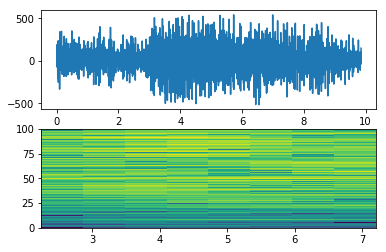

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
dt=(max(df['Time'])-min(df['Time']))/len(df.index)
t = np.arange(min(df['Time']), max(df['Time']), dt)

x =  np.array(df['Raw-Ch2'])  # the signal
NFFT = 1024  # the length of the windowing segments
Fs = int(1.0 / dt)  # the sampling frequency
fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(t, x)
Pxx, freqs, bins, im = ax2.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=900)
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the matplotlib.image.AxesImage instance representing the data in the plot
plt.show()

In [71]:
from __future__ import division, print_function
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.cm as cm

from matplotlib.collections import LineCollection
from matplotlib.ticker import MultipleLocator

def plot_EMG(time,emgs,gesture_name,normalize=False):
    fig = plt.figure("EMG")
    ticklocs = []
    numRows=8
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xticks(np.arange(10))
    dmin = emgs.min().min()
    dmax = emgs.max().max()
    dr = (dmax - dmin) * 1  # Crowd them a bit.
    y0 = 1
    y1 = (numRows - 1) * dr + dmax
    plt.ylim(y0, y1)
    
    segs = []
    for i,ch in enumerate(emgs[:8]):
        segs.append(np.hstack((time[:, np.newaxis], emgs[ch][:, np.newaxis])))
        ticklocs.append((i+0.25) * dr)

    offsets = np.zeros((numRows, 2), dtype=float)
    offsets[:, 1] = ticklocs

    lines = LineCollection(segs, offsets=offsets, transOffset=None)
    ax.add_collection(lines)

    # Set the yticks to use axes coordinates on the y axis
    ax.set_yticks(ticklocs)
    ax.set_yticklabels( [ 'Raw-Ch1','Raw-Ch2','Raw-Ch3','Raw-Ch4','Raw-Ch5','Raw-Ch6','Raw-Ch7','Raw-Ch8'])
    ax.set_title(gesture_name)
    ax.set_xlabel('Time (s)')
    
    plt.show()

def normalize_EEG(df):
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)
    return df

C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


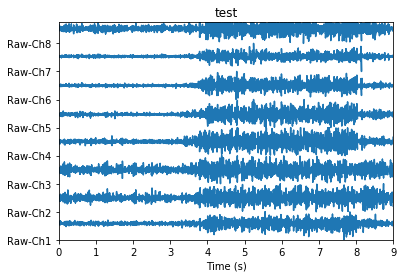

In [34]:
dt=np.double((max(df['Time'])-min(df['Time']))/len(df.index))
t = np.arange(min(df['Time']), max(df['Time'])-dt, dt)

pr.plot_EMG(df.Time,df.loc[:,[ 'Raw-Ch1','Raw-Ch2','Raw-Ch3','Raw-Ch4','Raw-Ch5','Raw-Ch6','Raw-Ch7','Raw-Ch8']],"test",normalize=True)

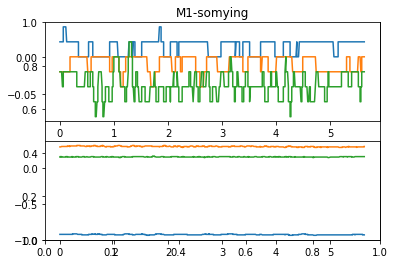

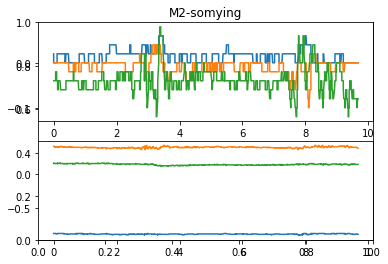

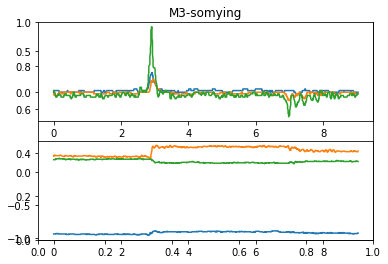

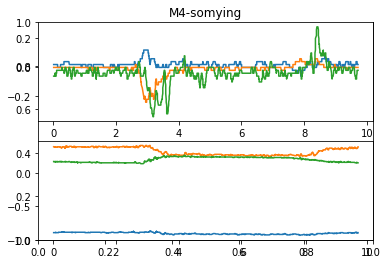

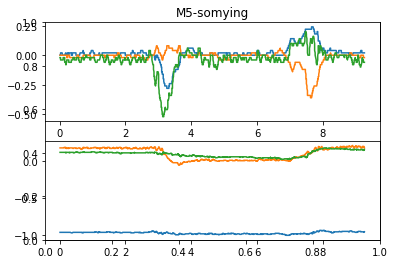

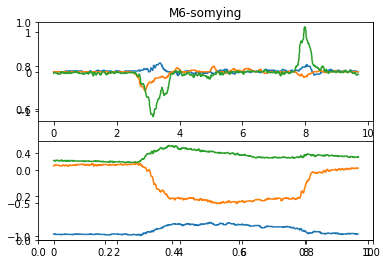

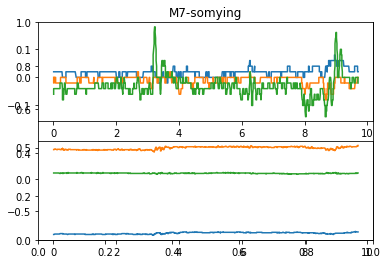

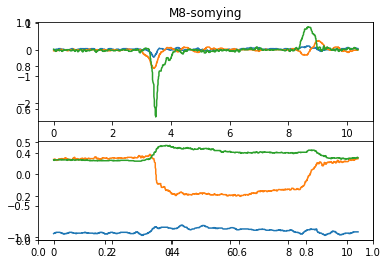

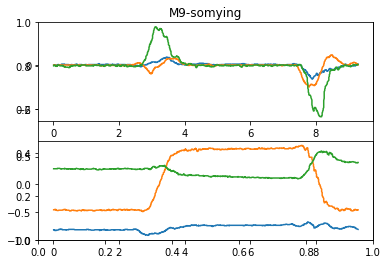

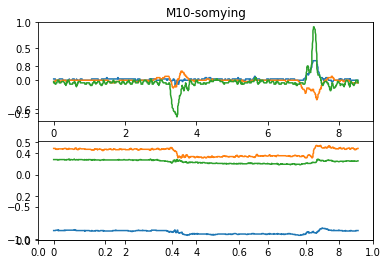

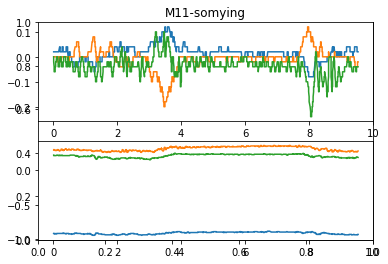

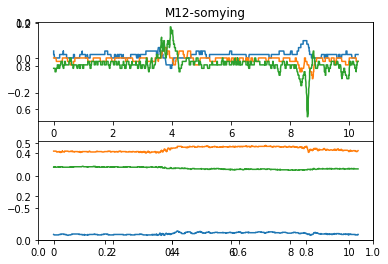

In [66]:
for i in range(1,13):
    filename = "M"+str(i)+"-somying"    
    df= pd.read_csv("data/Somying/"+filename+"/test-L-4.csv",names=['Batt','Time','C',
                                       'Raw-Ch1','Raw-Ch2','Raw-Ch3','Raw-Ch4','Raw-Ch5','Raw-Ch6','Raw-Ch7','Raw-Ch8','L',
                                       'Rect-Ch0','Rect-Ch1','Rect-Ch2','Rect-Ch3','Rect-Ch4','Rect-Ch5','Rect-Ch6','Rect-Ch7','U',
                                       'Smooth-Ch0','Smooth-Ch1','Smooth-Ch2','Smooth-Ch3','Smooth-Ch4','Smooth-Ch5','Smooth-Ch6','Smooth-Ch7','AD',
                                       'q1','q2','q3','q4','AI',
                                       'ax','ay','az','AM',
                                       'gx','gy','gz','AQ',
                                       'mx','my','mz',"AU"])
    d = df.loc[:,[ 'Raw-Ch1','Raw-Ch2','Raw-Ch3','Raw-Ch4','Raw-Ch5','Raw-Ch6','Raw-Ch7','Raw-Ch8']]
    fig = plt.figure("EMG")
    plt.title(filename)
    ax1 = fig.add_subplot(2, 1, 1)
    ax1.plot(df.Time,df.gx)
    ax1.plot(df.Time,df.gy)
    ax1.plot(df.Time,df.gz)
    ax2 = fig.add_subplot(2, 1, 2)
    ax2.plot(df.Time,df.ax)
    ax2.plot(df.Time,df.ay)
    ax2.plot(df.Time,df.az)
    plt.show()
    


In [3]:
ds=[]
for i in range(1,13):
    filename = "M"+str(i)+"-somying"    
    df= pd.read_csv("data/Somying/"+filename+"/test-L-2.csv",names=['Batt','Time','C',
                                       'Raw-Ch1','Raw-Ch2','Raw-Ch3','Raw-Ch4','Raw-Ch5','Raw-Ch6','Raw-Ch7','Raw-Ch8','L',
                                       'Rect-Ch0','Rect-Ch1','Rect-Ch2','Rect-Ch3','Rect-Ch4','Rect-Ch5','Rect-Ch6','Rect-Ch7','U',
                                       'Smooth-Ch0','Smooth-Ch1','Smooth-Ch2','Smooth-Ch3','Smooth-Ch4','Smooth-Ch5','Smooth-Ch6','Smooth-Ch7','AD',
                                       'q1','q2','q3','q4','AI',
                                       'ax','ay','az','AM',
                                       'gx','gy','gz','AQ',
                                       'mx','my','mz',"AU"])
    d = df.loc[:,[ 'Raw-Ch1','Raw-Ch2','Raw-Ch3','Raw-Ch4','Raw-Ch5','Raw-Ch6','Raw-Ch7','Raw-Ch8']]
    d= pr.normalize_EEG(d)
    ds.append(df)
    


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


<IPython.core.display.Javascript object>


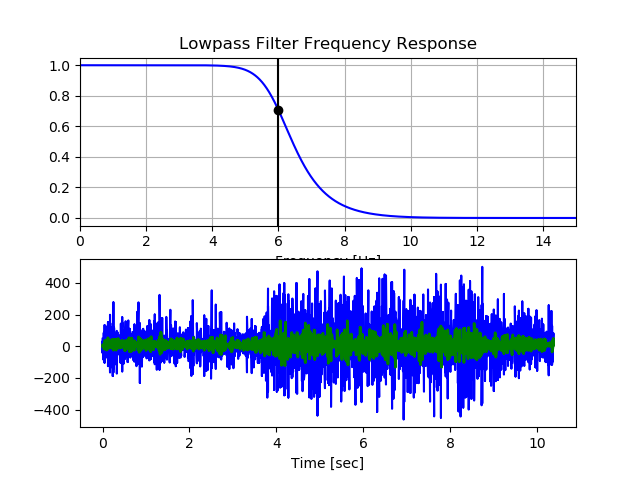

In [173]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 6  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = (max(df['Time'])-min(df['Time']))/len(df.index)         # seconds
t = np.arange(min(df['Time']), max(df['Time']), dt)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.array(df['Raw-Ch2']) 

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(df['Time'], data, 'b-', label='data')
plt.plot(df['Time'], y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.show()


In [107]:
dt=(max(df['Time'])-min(df['Time']))/len(df.index)
t = np.arange(min(df['Time']), max(df['Time']), dt)

x =  np.array(df['Raw-Ch2'])  # the signal

In [4]:
import numpy as np
import pylab

def thresholding_algo(y,u, lag, threshold, influence):
    signals = np.zeros(len(y))
    filteredY = np.array(y)
    avgFilter = [0]*len(y)
    stdFilter = [0]*len(y)
    avgFilter[lag - 1] = np.mean(u[0:lag])
    stdFilter[lag - 1] = np.std(u[0:lag])
    for i in range(lag, len(y)):
        if abs(y[i] - avgFilter[i-1]) > threshold * stdFilter [i-1]:
            if y[i] > avgFilter[i-1]:
                signals[i] = 1
            else:
                signals[i] = -1

            filteredY[i] = influence * y[i] + (1 - influence) * filteredY[i-1]
            avgFilter[i] = np.mean(filteredY[(i-lag):i])
            stdFilter[i] = np.std(filteredY[(i-lag):i])
        else:
            signals[i] = 0
            filteredY[i] = y[i]
            avgFilter[i] = np.mean(filteredY[(i-lag):i])
            stdFilter[i] = np.std(filteredY[(i-lag):i])

    return dict(signals = np.asarray(signals),
                avgFilter = np.asarray(avgFilter),
                stdFilter = np.asarray(stdFilter))

# Data
def find_active(ax,time,signal,lag,threshold,influence):
    
    x = np.array(time)  

    y =  np.array(signal)  
    # Se  algo with settings from above
    result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)

    # Plot result
    pylab.plt
    pylab.subplot(211)
    pylab.plot(x, y)

    pylab.plot(x,result["avgFilter"], color="cyan", lw=2)

    pylab.plot(x,result["avgFilter"] + threshold * result["stdFilter"], color="green", lw=2)

    pylab.plot(x,result["avgFilter"] - threshold * result["stdFilter"], color="green", lw=2)

    pylab.subplot(212)
    pylab.step(x, result["signals"], color="red", lw=2)
    pylab.ylim(-1.5, 1.5)
    pylab.show()

<IPython.core.display.Javascript object>


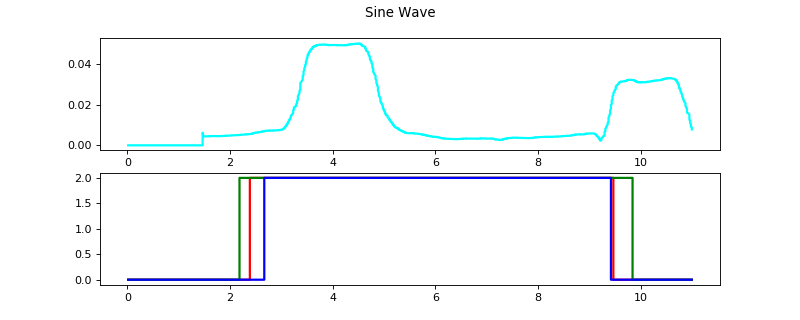

interactive(children=(IntSlider(value=300, description='lag:', max=1000, min=1), FloatSlider(value=3.6, descri…

In [77]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg

fig, (ax1,ax2) = plt.subplots(2, figsize=(10, 4))
plt.suptitle('Sine Wave')


def update_plot(lag,threshold,influence,threshold2):
    df = ds[5]
    bg = ds[0]
    x = np.array(df.Time)  

    #y =  np.array(df.gx)  
    # Se  algo with settings from above
    result_gx = thresholding_algo(df.gx,bg.gx, lag=lag, threshold=threshold, influence=influence)
    result_gy = thresholding_algo(df.gy,bg.gy, lag=lag, threshold=threshold, influence=influence)
    result_gz = thresholding_algo(df.gz,bg.gz, lag=lag, threshold=threshold, influence=influence)
    # Plot result
    ax1.clear()
    ax2.clear()
    
#     ax1.plot(df.Time,df.gx)
#     ax1.plot(df.Time,df.gy)
#     ax1.plot(df.Time,df.gz)
    g = np.abs(result_gz["avgFilter"])+np.abs(result_gy["avgFilter"])+np.abs(result_gx["avgFilter"])
    g=g/np.linalg.norm(g)
    ax1.plot(x,g, color="cyan", lw=2)
    
    #v=result["avgFilter"] + threshold * result["stdFilter"]
    #v[np.where(v>=1.2)[0][0]:np.where(v>=1.2)[0][-1]]=2
    #v[np.where(v<2)]=0
    #t1=x[np.where(v>=1.2)[0][0]]
    #t2=x[np.where(v>=1.2)[0][-1]]
    #print(t1,t2)
    #ax1.plot(x,v, color="green", lw=2)

    #ax1.plot(x,result_gx["avgFilter"] - threshold * result_gx["stdFilter"], color="green", lw=2)
    vx=np.abs(result_gx["signals"])
    vx[np.where(vx==1)[0][0]:np.where(vx==1)[0][-1]]=2
    
    vy=np.abs(result_gy["signals"])
    vy[np.where(vy==1)[0][0]:np.where(vy==1)[0][-1]]=2
    
    vz=np.abs(result_gz["signals"])
    vz[np.where(vz==1)[0][0]:np.where(vz==1)[0][-1]]=2
    
    

    ax2.step(x, vx, color="red", lw=2)
    ax2.step(x, vy, color="green", lw=2)
    ax2.step(x, vz, color="blue", lw=2)
    #ax2.step(x, g, color="pink", lw=2)
    plt.show()


lag = widgets.IntSlider(min=1, max=1000, value=300, description='lag:')
threshold = widgets.FloatSlider(min=0, max=10, value=3.6, description='threshold:')
influence = widgets.FloatSlider(min=0, max=10, value=1, description='influence:')
threshold2 = widgets.FloatSlider(min=0, max=2, value=0.6, description='threshold2:')

widgets.interactive(update_plot,lag=lag,threshold=threshold,influence=influence,threshold2=threshold2)

In [8]:
def find_active_time(time,emg,bg):
    T1 = []
    T2 = []
    for i in emg:
        x = time
        y = emg[i]

        lag=300
        threshold=3.6
        influence=0.6
        result = thresholding_algo(y, bg[i], lag=lag, threshold=threshold, influence=influence)
        v=np.abs(result["signals"])
     
        
        t1=x[np.where(v==1)[0][0]]
        t2=x[np.where(v==1)[0][-1]]
        T1.append(t1)
        T2.append(t2)
    t1 = np.mean(T1)
    t2 = np.mean(T2)
    return [t1,t2]

In [4]:
def find_active_time(time,emg):
    T1 = []
    T2 = []
    for i in emg:
        x = time
        y = emg[i]
        lag=25
        threshold=4.5
        influence=2
        result = thresholding_algo(y, bg,lag=lag, threshold=threshold, influence=influence)
        v=result["avgFilter"] + threshold * result["stdFilter"]

        v[np.where(v>=1.2)[0][0]:np.where(v>=1.2)[0][-1]]=2
        v[np.where(v<2)]=0
        t1=x[np.where(v>=1.2)[0][0]]
        t2=x[np.where(v>=1.2)[0][-1]]
        T1.append(t1)
        T2.append(t2)

    t1_mode,cout1 = stats.mode(T1)        
    t2_mode,cout2 = stats.mode(T2)    
    if cout1[0]==1:
        t1 = np.mean(T1)
    if cout2[0]==1:
        t2 = np.mean(T2)
    return [t1,t2]

In [3]:
plt.plot(df.Time,df.gx)
plt.plot(df.Time,df.gy)
plt.plot(df.Time,df.gz)

NameError: name 'df' is not defined

C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


<IPython.core.display.Javascript object>


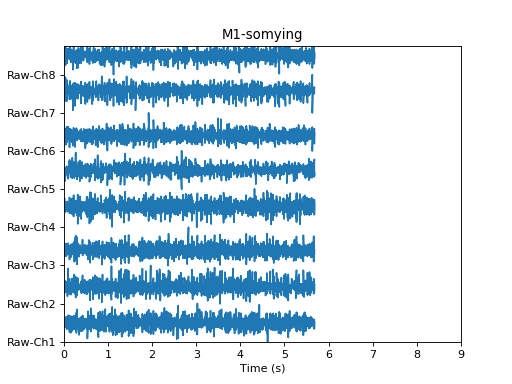

NameError: name 'find_active_time' is not defined

In [68]:
for i in range(1,13):
    filename = "M"+str(i)+"-somying"    
    df= pd.read_csv("data/Somying/"+filename+"/test-L-8.csv",names=['Batt','Time','C',
                                       'Raw-Ch1','Raw-Ch2','Raw-Ch3','Raw-Ch4','Raw-Ch5','Raw-Ch6','Raw-Ch7','Raw-Ch8','L',
                                       'Rect-Ch0','Rect-Ch1','Rect-Ch2','Rect-Ch3','Rect-Ch4','Rect-Ch5','Rect-Ch6','Rect-Ch7','U',
                                       'Smooth-Ch0','Smooth-Ch1','Smooth-Ch2','Smooth-Ch3','Smooth-Ch4','Smooth-Ch5','Smooth-Ch6','Smooth-Ch7','AD',
                                       'q1','q2','q3','q4','AI',
                                       'ax','ay','az','AM',
                                       'gx','gy','gz','AQ',
                                       'mx','my','mz',"AU"])
    d = df.loc[:,[ 'Raw-Ch1','Raw-Ch2','Raw-Ch3','Raw-Ch4','Raw-Ch5','Raw-Ch6','Raw-Ch7','Raw-Ch8']]
    ax,d1 = pr.plot_EMG(df.Time,d.loc[:,['Raw-Ch1','Raw-Ch2','Raw-Ch3','Raw-Ch4','Raw-Ch5','Raw-Ch6','Raw-Ch7','Raw-Ch8']],filename,normalize=True)
    d = pr.normalize_EEG(d)
    T =  find_active_time(df.Time,d)
    plt.axvline(x=T[0],color='r') 
    plt.axvline(x=T[1],color='r')
    plt.show()

C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


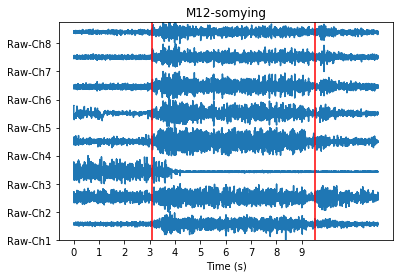

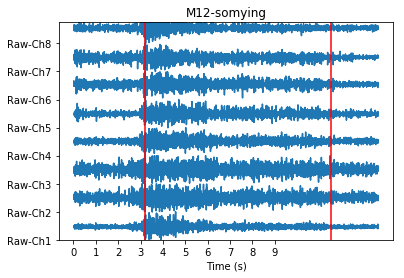

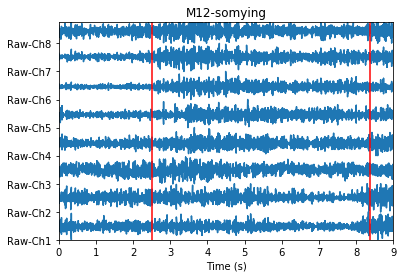

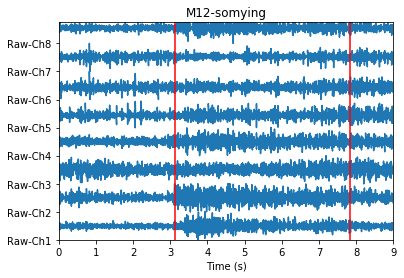

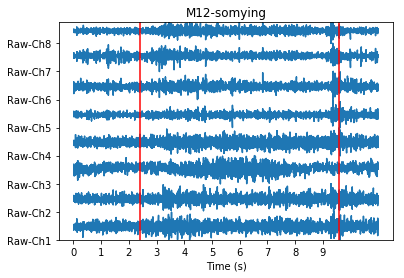

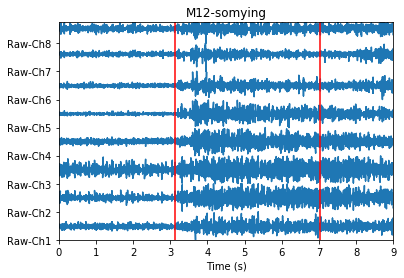

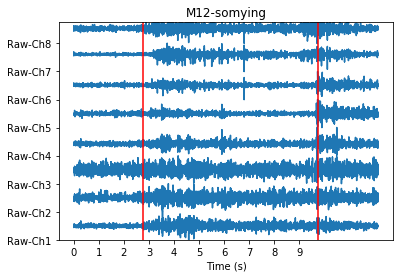

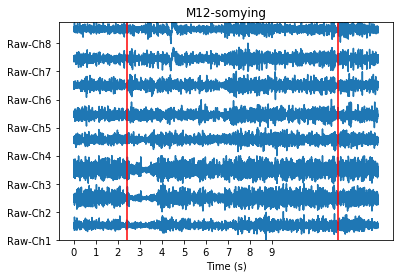

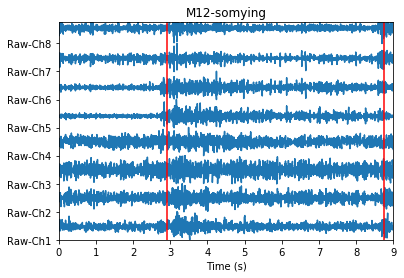

In [9]:
for d in ds[1:10]:
    ax,d1 = pr.plot_EMG(d.Time,d.loc[:,['Raw-Ch1','Raw-Ch2','Raw-Ch3','Raw-Ch4','Raw-Ch5','Raw-Ch6','Raw-Ch7','Raw-Ch8']],filename,normalize=True)
   
    T =  find_active_time(d.Time,d.loc[:,['gx','gy','gz']],ds[0].loc[:,['gx','gy','gz']])
    plt.axvline(x=T[0],color='r') 
    plt.axvline(x=T[1],color='r')
    plt.show()

In [7]:
from scipy import stats


In [27]:
cout

array([3])

In [28]:
if(cout[0]==0):
    print(9)